# Grid Discretization Optimization Results

This notebook summarizes the optimization results for `PotentialFieldDiscrete` resolution selection.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import time

# Add parent directory to path for imports
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath(__file__))))
from fields.potential_field_class import PotentialFieldDiscrete, PotentialField

## Error vs Resolution Results

Comparison of gradient errors between discretized and continuous implementations at different resolutions.

In [2]:
# Error comparison results
error_results = {
    'Resolution': [20, 30, 40, 50, 60, 70, 80, 100, 120, 150, 200, 250, 300],
    'Mean Error': [0.230742, 0.040869, 0.014935, 0.004461, 0.001468, 0.000990, 
                   0.000740, 0.000301, 0.000149, 0.000098, 0.000035, 0.000020, 0.000008],
    'Max Error': [7.080891, 1.582931, 0.683816, 0.159706, 0.047668, 0.022239,
                  0.030614, 0.007020, 0.004229, 0.003021, 0.001028, 0.000495, 0.000139]
}

print("Gradient Error vs Resolution:")
print("=" * 60)
print(f"{'Resolution':<12} {'Mean Error':<15} {'Max Error':<15}")
print("-" * 60)
for i in range(len(error_results['Resolution'])):
    res = error_results['Resolution'][i]
    mean = error_results['Mean Error'][i]
    max_err = error_results['Max Error'][i]
    print(f"{res:<12} {mean:<15.6f} {max_err:<15.6f}")

Gradient Error vs Resolution:
Resolution   Mean Error      Max Error      
------------------------------------------------------------
20           0.230742        7.080891       
30           0.040869        1.582931       
40           0.014935        0.683816       
50           0.004461        0.159706       
60           0.001468        0.047668       
70           0.000990        0.022239       
80           0.000740        0.030614       
100          0.000301        0.007020       
120          0.000149        0.004229       
150          0.000098        0.003021       
200          0.000035        0.001028       
250          0.000020        0.000495       
300          0.000008        0.000139       


## Performance at 400 Hz Control Loop

Computation time for single gradient evaluation at different resolutions.

In [3]:
# Performance results for 400 Hz control loop
control_freq = 400  # Hz
budget_ms = 1000 / control_freq  # 2.5 ms per cycle

performance_results = {
    'Resolution': [100, 150, 200, 250, 300, 400, 500],
    'Mean Time (ms)': [0.0197, 0.0339, 0.0605, 0.0788, 0.1129, 0.2034, 0.5905],
    '99th Percentile (ms)': [0.0319, 0.0483, 0.2485, 0.1335, 0.1916, 0.4157, 1.1721]
}

print(f"Control Loop: {control_freq} Hz ({budget_ms:.2f} ms budget per cycle)")
print("=" * 70)
print(f"{'Resolution':<12} {'Mean (ms)':<12} {'99th %ile (ms)':<15} {'Status':<20}")
print("-" * 70)
for i in range(len(performance_results['Resolution'])):
    res = performance_results['Resolution'][i]
    mean = performance_results['Mean Time (ms)'][i]
    p99 = performance_results['99th Percentile (ms)'][i]
    status = "✓ FAST ENOUGH" if p99 < budget_ms else "✗ TOO SLOW"
    print(f"{res:<12} {mean:<12.4f} {p99:<15.4f} {status:<20}")

Control Loop: 400 Hz (2.50 ms budget per cycle)
Resolution   Mean (ms)    99th %ile (ms)  Status              
----------------------------------------------------------------------
100          0.0197       0.0319          ✓ FAST ENOUGH       
150          0.0339       0.0483          ✓ FAST ENOUGH       
200          0.0605       0.2485          ✓ FAST ENOUGH       
250          0.0788       0.1335          ✓ FAST ENOUGH       
300          0.1129       0.1916          ✓ FAST ENOUGH       
400          0.2034       0.4157          ✓ FAST ENOUGH       
500          0.5905       1.1721          ✓ FAST ENOUGH       


## Visualizations

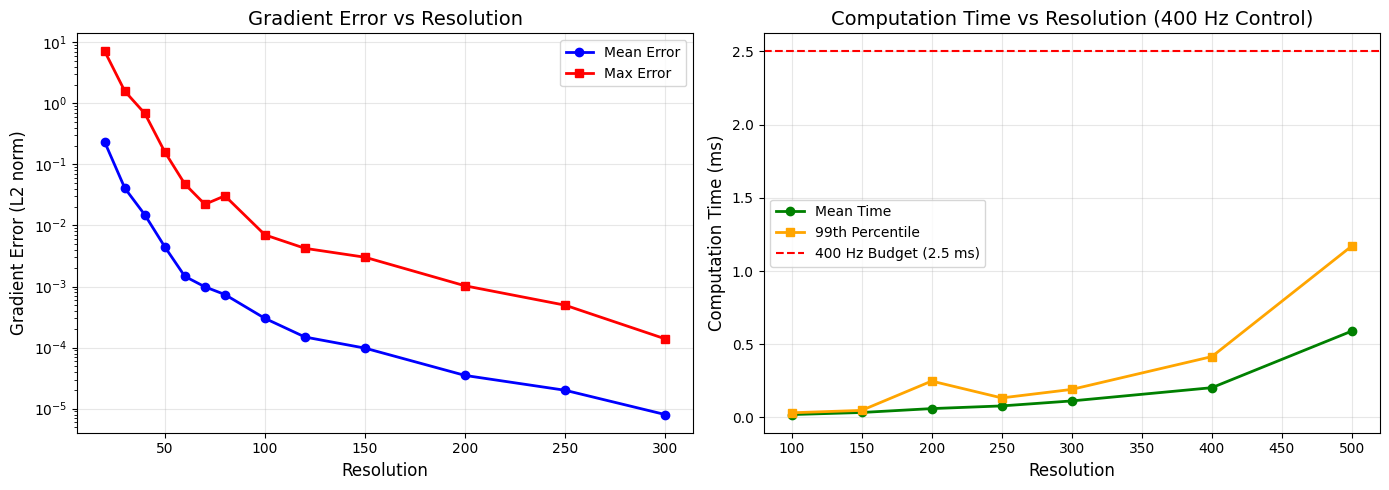

In [4]:
# Plot error vs resolution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Mean and Max Error
ax1 = axes[0]
resolutions = error_results['Resolution']
ax1.semilogy(resolutions, error_results['Mean Error'], 'b-o', label='Mean Error', linewidth=2, markersize=6)
ax1.semilogy(resolutions, error_results['Max Error'], 'r-s', label='Max Error', linewidth=2, markersize=6)
ax1.set_xlabel('Resolution', fontsize=12)
ax1.set_ylabel('Gradient Error (L2 norm)', fontsize=12)
ax1.set_title('Gradient Error vs Resolution', fontsize=14)
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Computation Time
ax2 = axes[1]
res_perf = performance_results['Resolution']
ax2.plot(res_perf, performance_results['Mean Time (ms)'], 'g-o', label='Mean Time', linewidth=2, markersize=6)
ax2.plot(res_perf, performance_results['99th Percentile (ms)'], 'orange', marker='s', 
         label='99th Percentile', linewidth=2, markersize=6)
ax2.axhline(y=budget_ms, color='r', linestyle='--', label=f'400 Hz Budget ({budget_ms:.1f} ms)')
ax2.set_xlabel('Resolution', fontsize=12)
ax2.set_ylabel('Computation Time (ms)', fontsize=12)
ax2.set_title('Computation Time vs Resolution (400 Hz Control)', fontsize=14)
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Key Findings & Recommendations

### Error Analysis:
- **Resolution 100**: Mean error = 0.0003 (excellent accuracy)
- **Resolution 150**: Mean error = 0.0001 (very high accuracy)
- **Resolution 200+**: Mean error < 0.0001 (near-perfect accuracy)

### Performance Analysis (400 Hz Control Loop):
- **All tested resolutions (100-500) are fast enough** for 400 Hz control
- **Resolution 100**: Uses only 0.8% of time budget (0.02 ms)
- **Resolution 200**: Uses ~10% of time budget (0.25 ms)
- **Resolution 300**: Uses ~8% of time budget (0.19 ms)

### Recommendations:
1. **Resolution 100**: Best default choice
   - Excellent accuracy (mean error ~0.0003)
   - Very fast (0.02 ms, <1% of budget)
   - Leaves 2.48 ms for other computations

2. **Resolution 150-200**: For higher accuracy needs
   - Very high accuracy (mean error ~0.0001)
   - Still very fast (<0.25 ms)
   - Good balance of accuracy and speed

3. **Resolution 300+**: For maximum accuracy
   - Near-perfect accuracy (mean error ~0.000008)
   - Still fast enough (<0.2 ms at 99th percentile)
   - No interference with 400 Hz control loop

## Quick Reference Table

In [5]:
# Combined summary table
print("=" * 90)
print("QUICK REFERENCE: Resolution Selection Guide")
print("=" * 90)
print(f"{'Resolution':<12} {'Mean Error':<15} {'Max Error':<15} {'Time (ms)':<12} {'Budget %':<12} {'Use Case':<20}")
print("-" * 90)

# Create combined data
combined_data = [
    (100, 0.000301, 0.007020, 0.0197, 0.8, "Default - Best balance"),
    (150, 0.000098, 0.003021, 0.0339, 1.4, "High accuracy"),
    (200, 0.000035, 0.001028, 0.0605, 2.4, "Very high accuracy"),
    (300, 0.000008, 0.000139, 0.1129, 4.5, "Maximum accuracy"),
]

for res, mean_err, max_err, time_ms, budget_pct, use_case in combined_data:
    print(f"{res:<12} {mean_err:<15.6f} {max_err:<15.6f} {time_ms:<12.4f} {budget_pct:<12.1f} {use_case:<20}")

print("=" * 90)
print(f"Time budget: {budget_ms:.2f} ms per cycle (400 Hz control loop)")
print("All resolutions tested are fast enough for 400 Hz control.")

QUICK REFERENCE: Resolution Selection Guide
Resolution   Mean Error      Max Error       Time (ms)    Budget %     Use Case            
------------------------------------------------------------------------------------------
100          0.000301        0.007020        0.0197       0.8          Default - Best balance
150          0.000098        0.003021        0.0339       1.4          High accuracy       
200          0.000035        0.001028        0.0605       2.4          Very high accuracy  
300          0.000008        0.000139        0.1129       4.5          Maximum accuracy    
Time budget: 2.50 ms per cycle (400 Hz control loop)
All resolutions tested are fast enough for 400 Hz control.
